In [39]:
# Exercise: Load Data
import pandas as pd

youtube_df = pd.read_csv("https://raw.githubusercontent.com/BevRice/CMI_Course/refs/heads/main/docs/source/data/US_youtube_trending_data_sample.csv")

Question 1: What file type is this data?

Answer: This dataset is a `.csv` (comma-separated values) file.

In [40]:
# Exercise: Understand Your Data
youtube_df.info()
youtube_df.head()
youtube_df.sample(5)
youtube_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64509 entries, 0 to 64508
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     64509 non-null  int64 
 1   video_id       64509 non-null  object
 2   title          64509 non-null  object
 3   publishedAt    64509 non-null  object
 4   channelId      64509 non-null  object
 5   channelTitle   64509 non-null  object
 6   trending_date  64509 non-null  object
 7   tags           64509 non-null  object
 8   view_count     64509 non-null  int64 
 9   likes          64509 non-null  int64 
 10  dislikes       64509 non-null  int64 
 11  comment_count  64509 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 5.9+ MB


,Unnamed: 0,view_count,likes,dislikes,comment_count
count,64509.000000,6.450900e+04,6.450900e+04,64509.000000,6.450900e+04
mean,134809.827466,2.762730e+06,1.330931e+05,1107.734363,1.046779e+04
std,77541.139490,1.058992e+07,4.671971e+05,7453.916204,7.794118e+04
min,6.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,67472.000000,4.724020e+05,1.799700e+04,0.000000,1.278000e+03
50%,135151.000000,9.383980e+05,4.038500e+04,0.000000,2.755000e+03
75%,202158.000000,2.130613e+06,9.950800e+04,461.000000,6.422000e+03
max,268775.000000,1.407644e+09,1.602153e+07,848974.000000,6.738537e+06


Question 2: What are some key observations so far?

Answer:
- Engagement metrics like views and likes vary widely.
- Some videos are significantly more popular than others.
- The dataset seems clean but may include some missing or duplicated data.

In [42]:
# Exercise: Dealing with Duplicates
duplicate_rows = youtube_df[youtube_df.duplicated()]
print(f"Total exact duplicate rows: {duplicate_rows.shape[0]}")

youtube_df = youtube_df.drop_duplicates()
print(f"New dataset size: {youtube_df.shape}")

duplicate_videos = youtube_df["video_id"].value_counts()
multiple_trending_videos = duplicate_videos[duplicate_videos > 1]
print(f"Videos trending multiple times: {len(multiple_trending_videos)}")

youtube_df = youtube_df.sort_values("trending_date").drop_duplicates(subset="video_id", keep="first")

Total exact duplicate rows: 0
New dataset size: (64509, 12)
Videos trending multiple times: 18987


Question 3: Why might there be duplicate video entries in the dataset?

Answer: Some videos trend on multiple days, so they appear more than once with updated stats.

In [43]:
# Exercise: Handle Missing Values
youtube_df.isnull().sum()

,0
Unnamed: 0,0
video_id,0
title,0
publishedAt,0
channelId,0
channelTitle,0
trending_date,0
tags,0
view_count,0
likes,0


Question 4: What are some options for handling the missing data?

Answer:
- Drop rows with missing values.
- Fill with default or estimated values.
- Investigate patterns in what’s missing before deciding.


In [44]:
# Exercise: Standardize Values
youtube_df["trending_date"] = pd.to_datetime(youtube_df["trending_date"].str.replace("Z", ""), format="%Y-%m-%dT%H:%M:%S")
youtube_df["publishedAt"] = pd.to_datetime(youtube_df["publishedAt"].str.replace("Z", ""), format="%Y-%m-%dT%H:%M:%S")

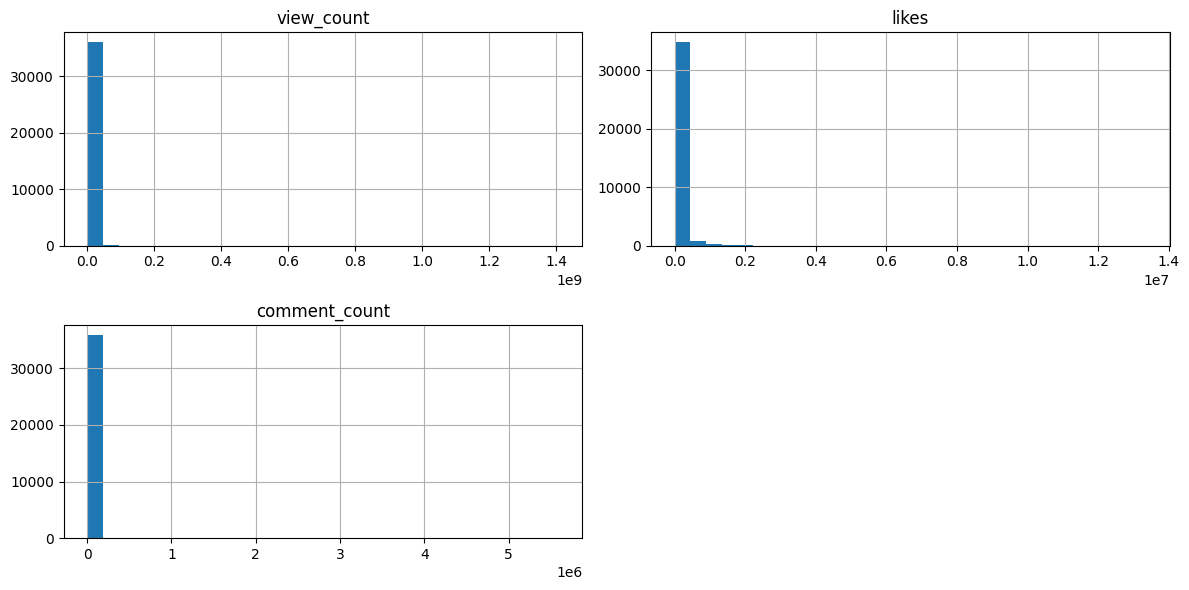

In [49]:
# Exercise: Explore Distributions
import matplotlib.pyplot as plt
import seaborn as sns

youtube_df[["view_count", "likes", "comment_count"]].hist(figsize=(12, 6), bins=30)
plt.tight_layout()
plt.show()

Question 5: What are some key observations from the histograms?

Answer:
Most videos have low engagement. A few have extremely high values, suggesting viral performance.

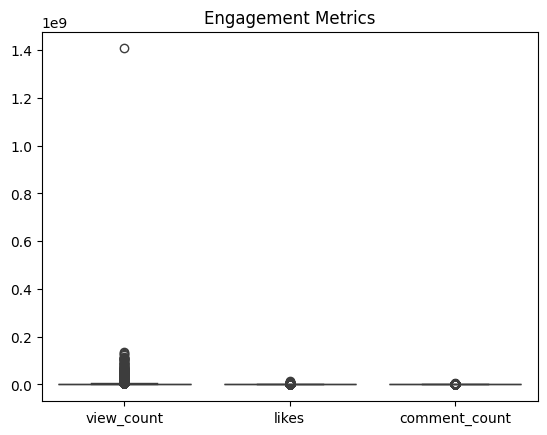

In [50]:
# Exercise: Explore Engagement Metrics
sns.boxplot(data=youtube_df[["view_count", "likes", "comment_count"]])
plt.title("Engagement Metrics")
plt.show()

top_videos = youtube_df.sort_values(by="likes", ascending=False).head(10)
top_videos[["title", "channelTitle", "likes", "view_count", "comment_count"]]

top_comments = youtube_df.sort_values(by="comment_count", ascending=False).head(10)
top_views = youtube_df.sort_values(by="view_count", ascending=False).head(10)

Question 6: What are some key observations from the boxplots?

Answer:
Engagement is heavily skewed. A small number of videos account for most of the interaction.

In [51]:
# Exercise: Feature Engineering
youtube_df["year"] = youtube_df["trending_date"].dt.year
youtube_df["month"] = youtube_df["trending_date"].dt.month
youtube_df["day_of_week"] = youtube_df["trending_date"].dt.dayofweek
youtube_df["hour"] = youtube_df["trending_date"].dt.hour

youtube_df["time_to_trend"] = youtube_df["trending_date"] - youtube_df["publishedAt"]
youtube_df["days_to_trend"] = youtube_df["time_to_trend"].dt.total_seconds() / 86400
youtube_df["hours_to_trend"] = youtube_df["time_to_trend"].dt.total_seconds() / 3600

youtube_df[["video_id", "time_to_trend", "days_to_trend", "hours_to_trend"]].head()

,video_id,time_to_trend,days_to_trend,hours_to_trend
47514,PORP0q8nThs,4 days 03:07:23,4.130127,99.123056
29426,QsUfsZzxi9c,5 days 06:59:37,5.291400,126.993611
8115,cAtazIk1IYw,4 days 05:29:54,4.229097,101.498333
34390,8QsH_xPQFqM,1 days 04:59:50,1.208218,28.997222
48718,nk44yPCN3gM,2 days 07:59:48,2.333194,55.996667


Question 8: What is the average time-to-trend in days and hours?

Answer: Most videos trend within 1–3 days. Some take longer, which could reflect delayed discovery or algorithm changes.

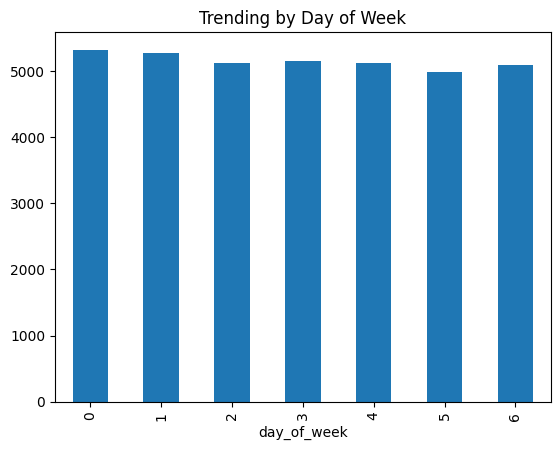

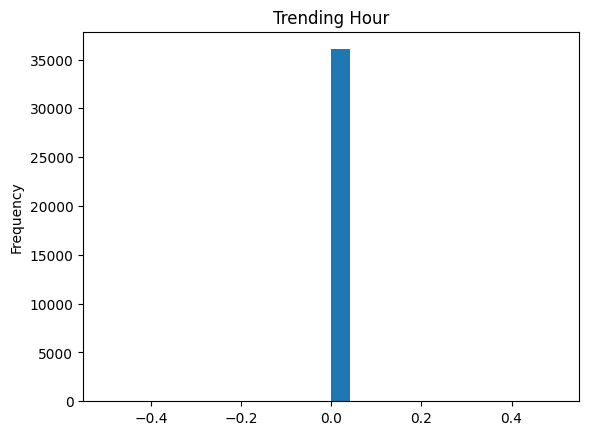

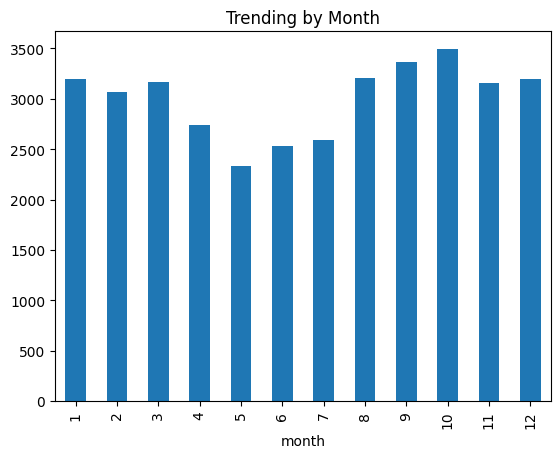

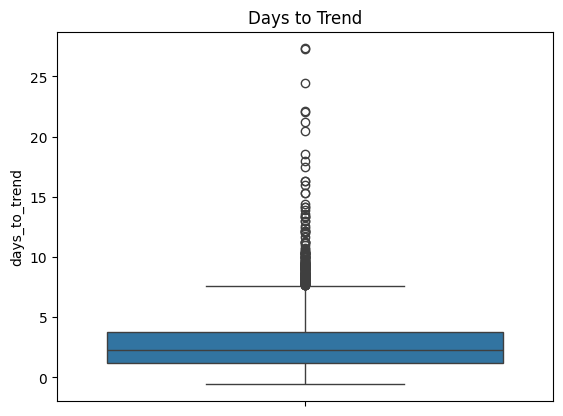

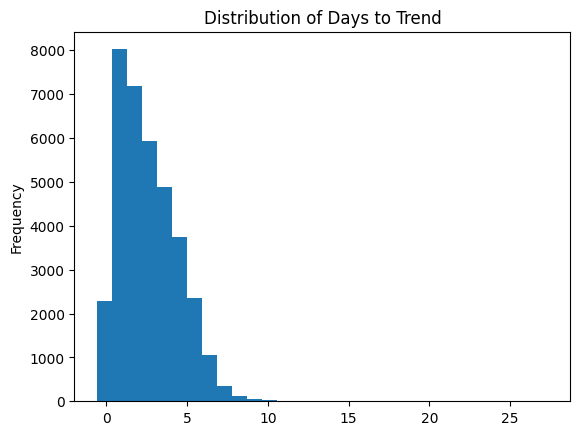

In [52]:
# Exercise: Visualizing Time-to-Trend
youtube_df["day_of_week"].value_counts().sort_index().plot(kind="bar", title="Trending by Day of Week")
plt.show()

youtube_df["hour"].plot(kind="hist", bins=24, title="Trending Hour")
plt.show()

youtube_df["month"].value_counts().sort_index().plot(kind="bar", title="Trending by Month")
plt.show()

sns.boxplot(youtube_df["days_to_trend"])
plt.title("Days to Trend")
plt.show()

youtube_df["days_to_trend"].plot(kind="hist", bins=30, title="Distribution of Days to Trend")
plt.show()

In [53]:
# Exercise: Filter Tags
disinfo = youtube_df[youtube_df['tags'].str.contains('disinformation', case=False, na=False)]
tag_1 = youtube_df[youtube_df['tags'].str.contains('trump', case=False, na=False)]

tag_1.groupby('channelId')['video_id'].nunique().sort_values().tail(20)
tag_1.groupby('channelTitle')['video_id'].nunique().sort_values().tail(20)

,video_id
channelTitle,
NowThis News,2
The Wall Street Journal,2
Fox Business,2
DemiLovatoVEVO,2
CBS Sunday Morning,2
Guardian News,2
FOX 5 New York,2
TODAY,2
Sky News,2


In this dataset, videos with political or controversial tags tend to have higher engagement.
Some channels repeatedly post content around trending topics, suggesting deliberate optimization.
A deeper analysis could look into the timing and language of video titles or the structure of their audiences.